## BITCOIN TIME SERIES



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
df = pd.read_excel("btc.xlsx", header=2)
df.head()

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2020-10-05,11296.082031,11428.813477,11288.627930,11384.181641,19968627060
1,2020-10-12,11392.635742,11698.467773,11223.012695,11483.359375,162045277956
2,2020-10-19,11495.038086,13329.183594,11408.290039,13031.173828,210845277262
3,2020-10-26,13031.201172,14028.213867,12822.382812,13737.109375,240919962782
4,2020-11-02,13737.032227,15903.437500,13243.160156,15479.567383,238108964192


================ START ANALYSIS FOR: BTC ================

--- A. Random Walk Test (ADF) in Precies ---
ADF Statistic: 0.1592
p-value: 0.9699
CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).

--- B. Autocorrelation analysis (ACF) ---
Save graph ACF as 'BTC_acf_analysis.png'

--- C. Volatility and clustering visualization ---
Save graph Volatility as 'BTC_volatility_clustering.png'
================BTC analysis was ending =================



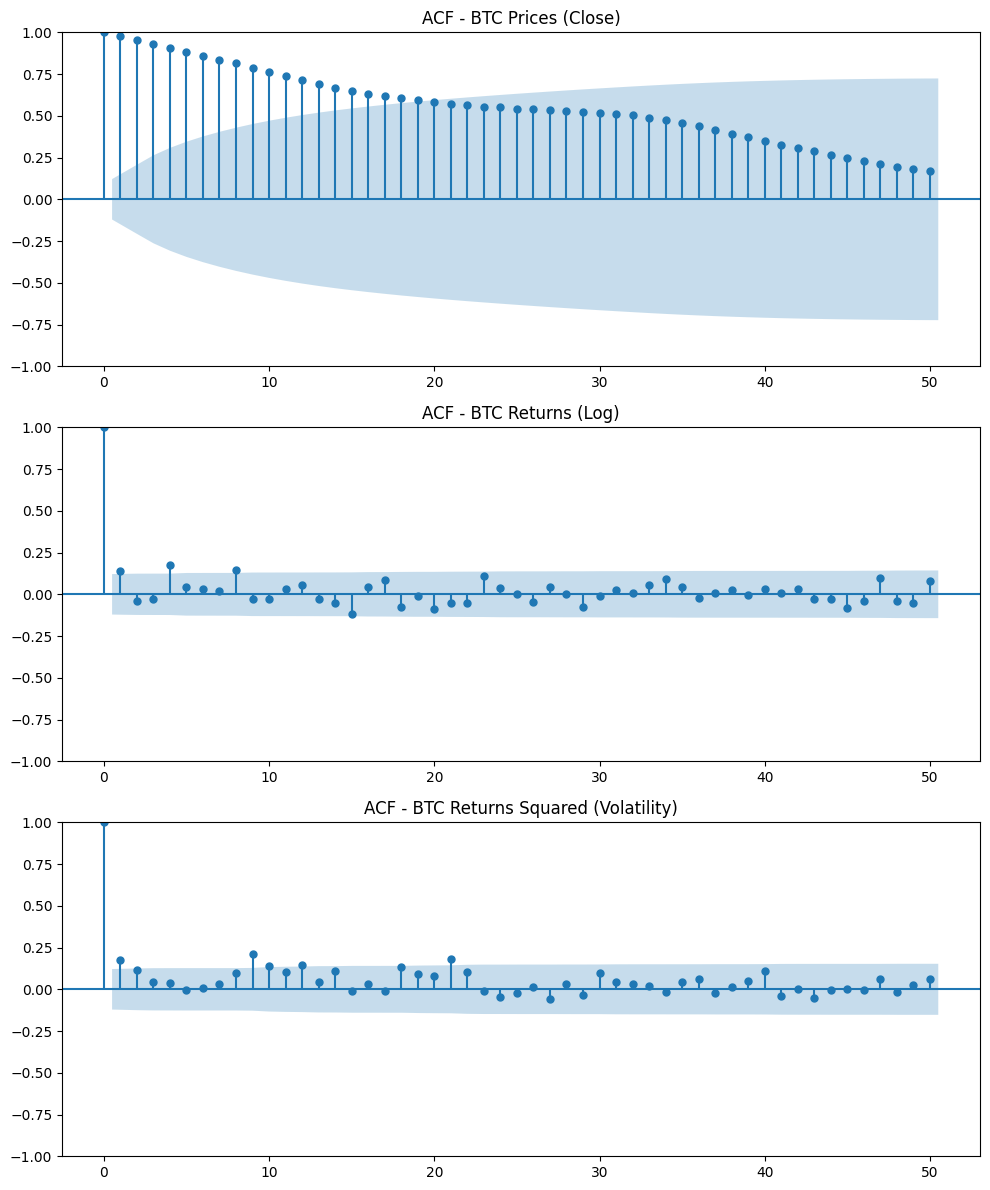

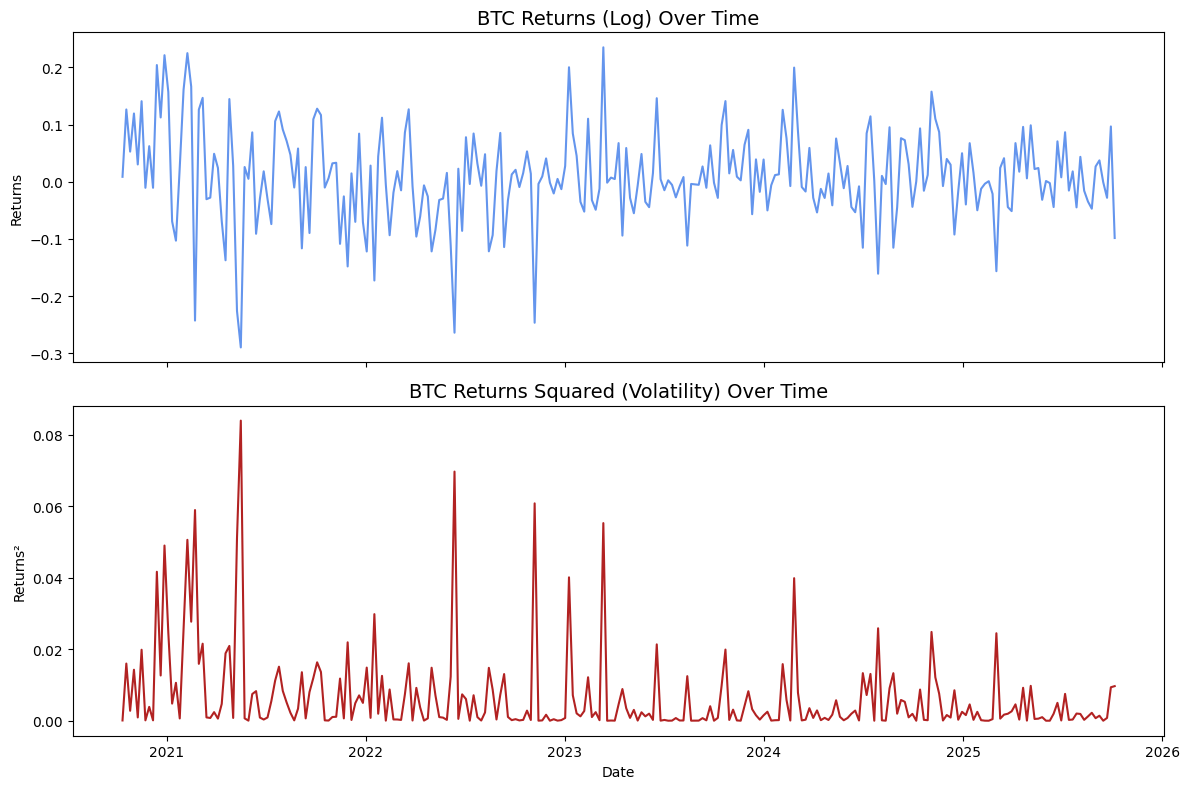

In [ ]:
def analizar_crypto_series(ticker_name):
    """
    Load data, calculate prices, returns, and volatility,
    apply ADF and ACF tests, and visualize clustered volatility.
    # it's starting 12 de octubre de 2020
    """

    print(f"================ START ANALYSIS FOR: {ticker_name} ================")

    try:

        df = pd.read_excel("btc.xlsx", header=2)


        # Rename and choose Date column and close column
        df = df.rename(columns={'Date': 'Date','Unnamed: 1': 'Open', 'Unnamed: 2': 'High', 'Unnamed: 3': 'Low',  'Unnamed: 4': 'Close', 'Unnamed: 5': 'Volume'})

        # Convert date in datetime
        df['Date'] = pd.to_datetime(df['Date'])
        df = df.set_index('Date')

        # 1. Price series
        prices = df['Close'].dropna()

        # 2. Return series (Log Returns)
        # Use .shift(1) to give the price day before.
        returns = np.log(prices / prices.shift(1)).dropna()

        # 3. Return^2 series (Proxy para Volatilidad) # Proxy for Volatility
        returns_sq = returns**2

    except Exception as e:
        print(f"ERROR to show the file: {e}")
        return

    # ----------------------------------------------------------------------
    # A. 1.1 Random Walk Test (ADF) en Prices # in Prices
    # ----------------------------------------------------------------------
    print("\n--- A. Random Walk Test (ADF) in Precies ---")
    adf_result = adfuller(prices)

    print(f'ADF Statistic: {adf_result[0]:.4f}')
    print(f'p-value: {adf_result[1]:.4f}')

    if adf_result[1] > 0.05:
        print("CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).")
    else:
        print("CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.")

    # ----------------------------------------------------------------------
    # B. 1.2 ACF Analysis
    # ----------------------------------------------------------------------
    print("\n--- B. Autocorrelation analysis (ACF) ---")

    # Graph of ACF for 3 series
    fig, axes = plt.subplots(3, 1, figsize=(10, 12))

    plot_acf(prices, lags=50, ax=axes[0], title=f'ACF - {ticker_name} Prices (Close)')
    plot_acf(returns, lags=50, ax=axes[1], title=f'ACF - {ticker_name} Returns (Log)')
    plot_acf(returns_sq, lags=50, ax=axes[2], title=f'ACF - {ticker_name} Returns Squared (Volatility)')

    plt.tight_layout()
    plt.savefig(f'{ticker_name}_acf_analysis.png')
    #plt.close()

    print(f"Save graph ACF as '{ticker_name}_acf_analysis.png'")

    # ----------------------------------------------------------------------
    # C. 1.3 Volatility and Clustering
    # ----------------------------------------------------------------------
    print("\n--- C. Volatility and clustering visualization ---")

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Plot 1: Returns Series
    axes[0].plot(returns.index, returns.values, color='cornflowerblue')
    axes[0].set_title(f'{ticker_name} Returns (Log) Over Time', fontsize=14)
    axes[0].set_ylabel('Returns')

    # Plot 2: Squared Returns Series (proxy for Volatility)
    axes[1].plot(returns_sq.index, returns_sq.values, color='firebrick')
    axes[1].set_title(f'{ticker_name} Returns Squared (Volatility) Over Time', fontsize=14)
    axes[1].set_ylabel('Returns²')
    axes[1].set_xlabel('Date')

    plt.tight_layout()
    plt.savefig(f'{ticker_name}_volatility_clustering.png')
    #plt.close()

    print(f"Save graph Volatility as '{ticker_name}_volatility_clustering.png'")
    print(f"================{ticker_name} analysis was ending =================\n")


nombre_btc = "BTC"

analizar_crypto_series(nombre_btc)

## ADA TIME SERIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf


================ STARTING ANALYSIS FOR: ADA ================
Data processed successfully.

--- 3.1 Random Walk Test (ADF) on Prices ---
ADF Statistic: -2.3933
p-value: 0.1436
CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).

--- 4. Autocorrelation Analysis (ACF) ---
ACF graph saved as 'ADA_acf_analysis.png'

--- 5. Clustered Volatility Visualization ---
Volatility graph saved as 'ADA_volatility_clustering.png'
================ ADA ANALYSIS FINISHED =================



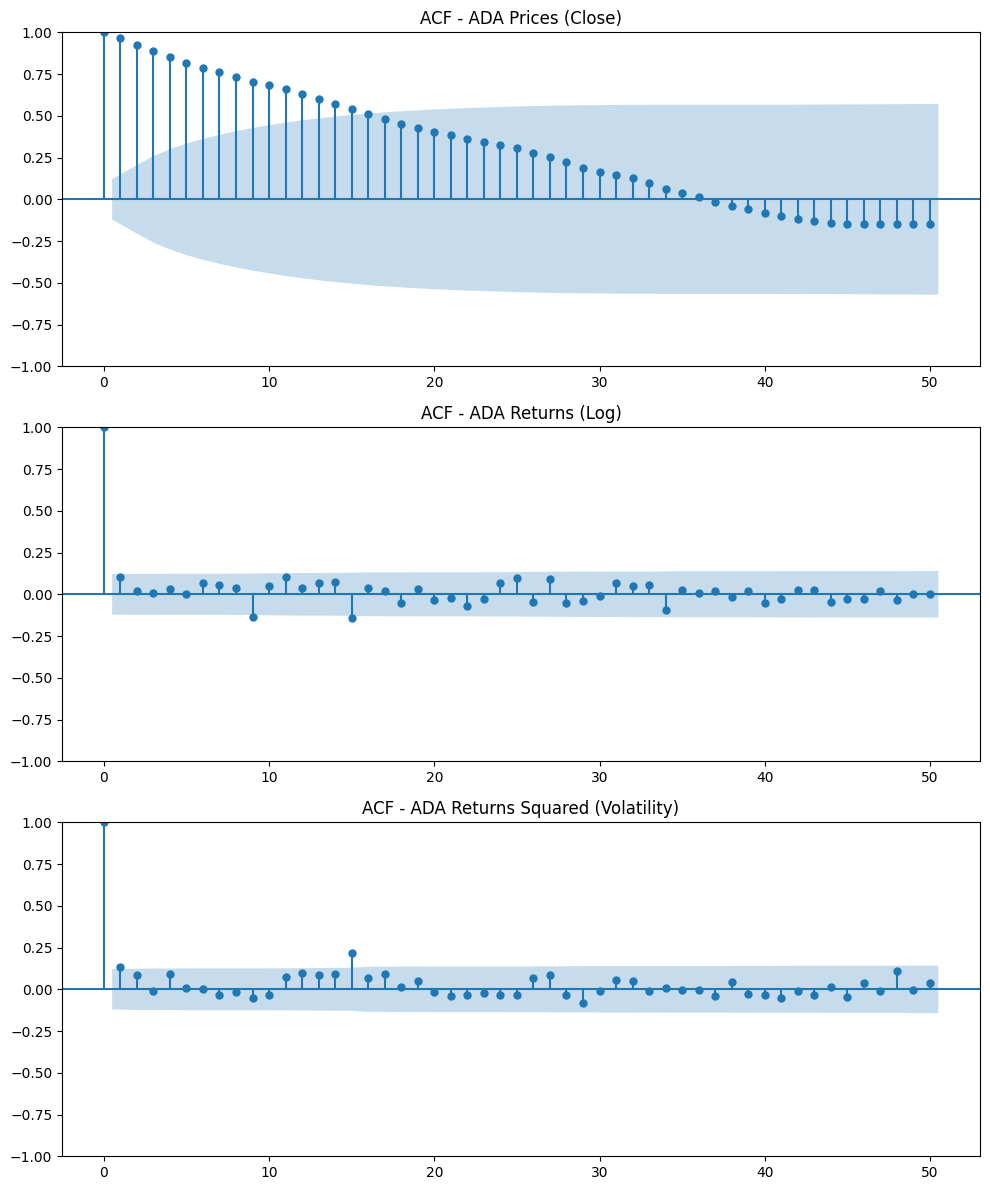

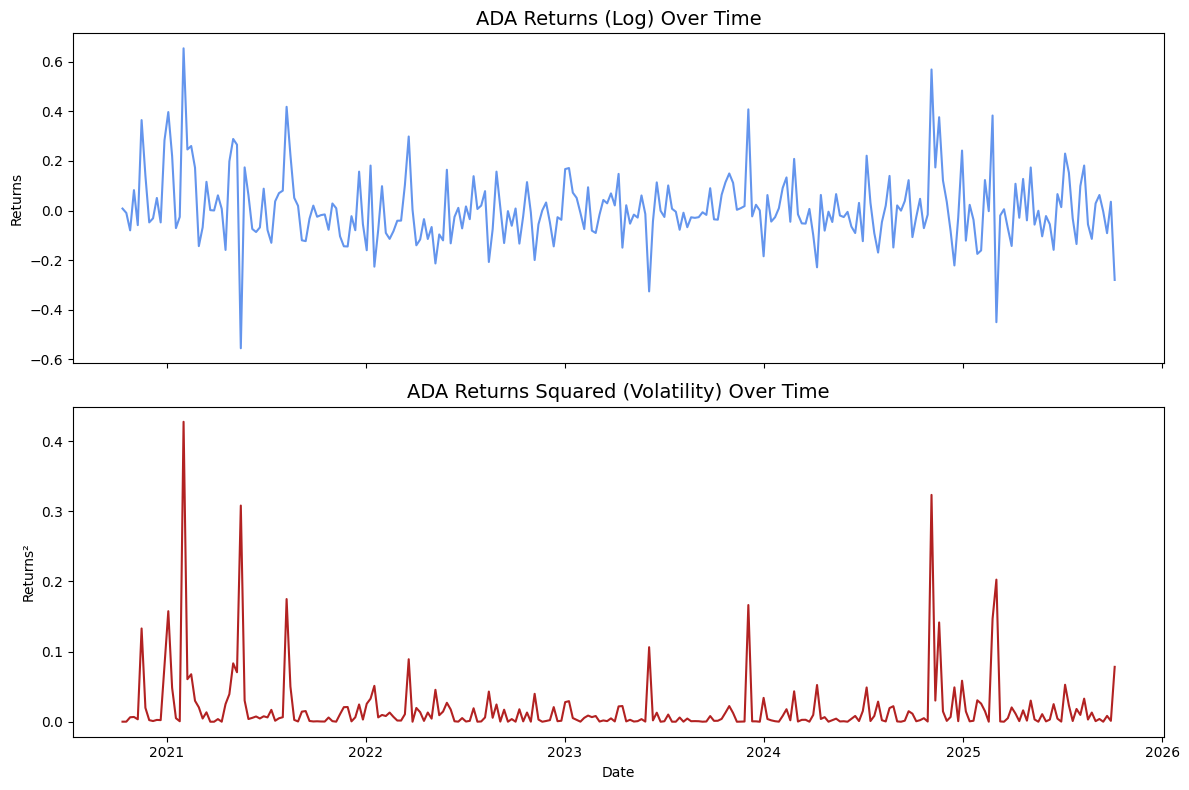

In [ ]:
file_path = "ada.csv.xlsx"
ticker_name = "ADA"

print(f"================ STARTING ANALYSIS FOR: {ticker_name} ================")

# ----------------------------------------------------------------------
# 1. DATA PREPARATION
# ----------------------------------------------------------------------


df = pd.read_excel(file_path, header=2)

# Select and rename the Close price column and Date
df = df.rename(columns={'Date': 'Date','Unnamed: 1': 'Open', 'Unnamed: 2': 'High', 'Unnamed: 3': 'Low',  'Unnamed: 4': 'Close', 'Unnamed: 5': 'Volume'})

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 1. Price Series (Close)
prices = df['Close'].dropna()

# 2. Returns Series (Log Returns)
returns = np.log(prices / prices.shift(1)).dropna()

# 3. Squared Returns Series (Proxy for Volatility)
returns_sq = returns**2

print("Data processed successfully.")

# ----------------------------------------------------------------------
# 2. 1.1 Random Walk Test (ADF) on Prices
# ----------------------------------------------------------------------
print("\n--- 3.1 Random Walk Test (ADF) on Prices ---")
adf_result = adfuller(prices)

print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] > 0.05:
    print("CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).")
else:
    print("CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.")

# ----------------------------------------------------------------------
# 3. 1.2 ACF Analysis (Autocorrelation) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 4. Autocorrelation Analysis (ACF) ---")

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# ACF for Prices
plot_acf(prices, lags=50, ax=axes[0], title=f'ACF - {ticker_name} Prices (Close)')
# ACF for Returns
plot_acf(returns, lags=50, ax=axes[1], title=f'ACF - {ticker_name} Returns (Log)')
# ACF for Squared Returns
plot_acf(returns_sq, lags=50, ax=axes[2], title=f'ACF - {ticker_name} Returns Squared (Volatility)')

plt.tight_layout()
plt.savefig(f'{ticker_name}_acf_analysis.png')
#plt.close()

print(f"ACF graph saved as '{ticker_name}_acf_analysis.png'")

# ----------------------------------------------------------------------
# 4. 1.3 Volatility and Clustering (Visualization) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 5. Clustered Volatility Visualization ---")

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Returns Series
axes[0].plot(returns.index, returns.values, color='cornflowerblue')
axes[0].set_title(f'{ticker_name} Returns (Log) Over Time', fontsize=14)
axes[0].set_ylabel('Returns')

# Plot 2: Squared Returns Series (proxy for Volatility)
axes[1].plot(returns_sq.index, returns_sq.values, color='firebrick')
axes[1].set_title(f'{ticker_name} Returns Squared (Volatility) Over Time', fontsize=14)
axes[1].set_ylabel('Returns²')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.savefig(f'{ticker_name}_volatility_clustering.png')
#plt.close()

print(f"Volatility graph saved as '{ticker_name}_volatility_clustering.png'")
print(f"================ {ticker_name} ANALYSIS FINISHED =================\n")

## DOGE TIME SERIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf


================ STARTING ANALYSIS FOR: DOGE ================
Data processed successfully.

--- 3.1 Random Walk Test (ADF) on Prices ---
ADF Statistic: -2.9982
p-value: 0.0351
CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.

--- 4. Autocorrelation Analysis (ACF) ---
ACF graph saved as 'DOGE_acf_analysis.png'

--- 5. Clustered Volatility Visualization ---
Volatility graph saved as 'DOGE_volatility_clustering.png'
================ DOGE ANALYSIS FINISHED =================



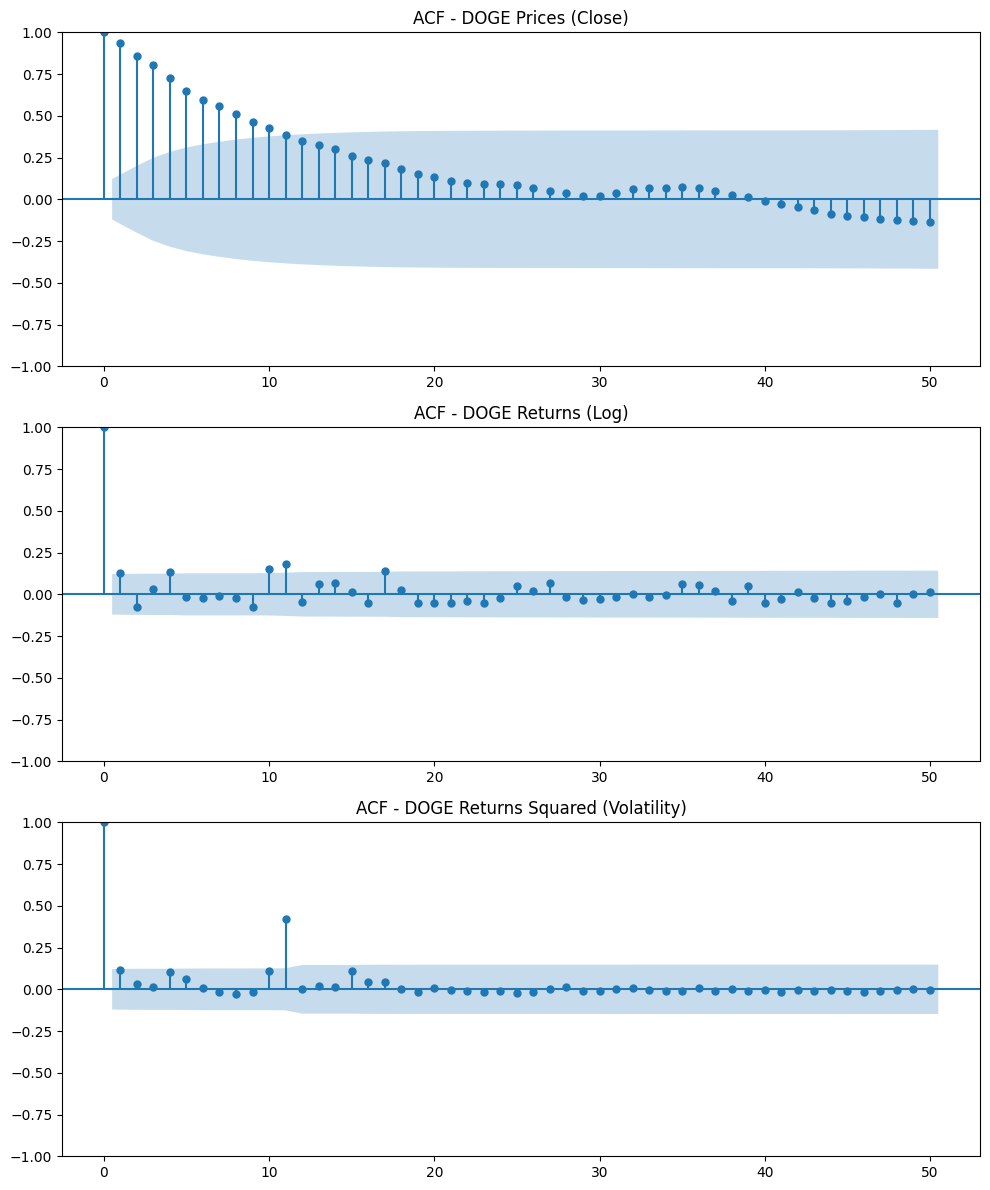

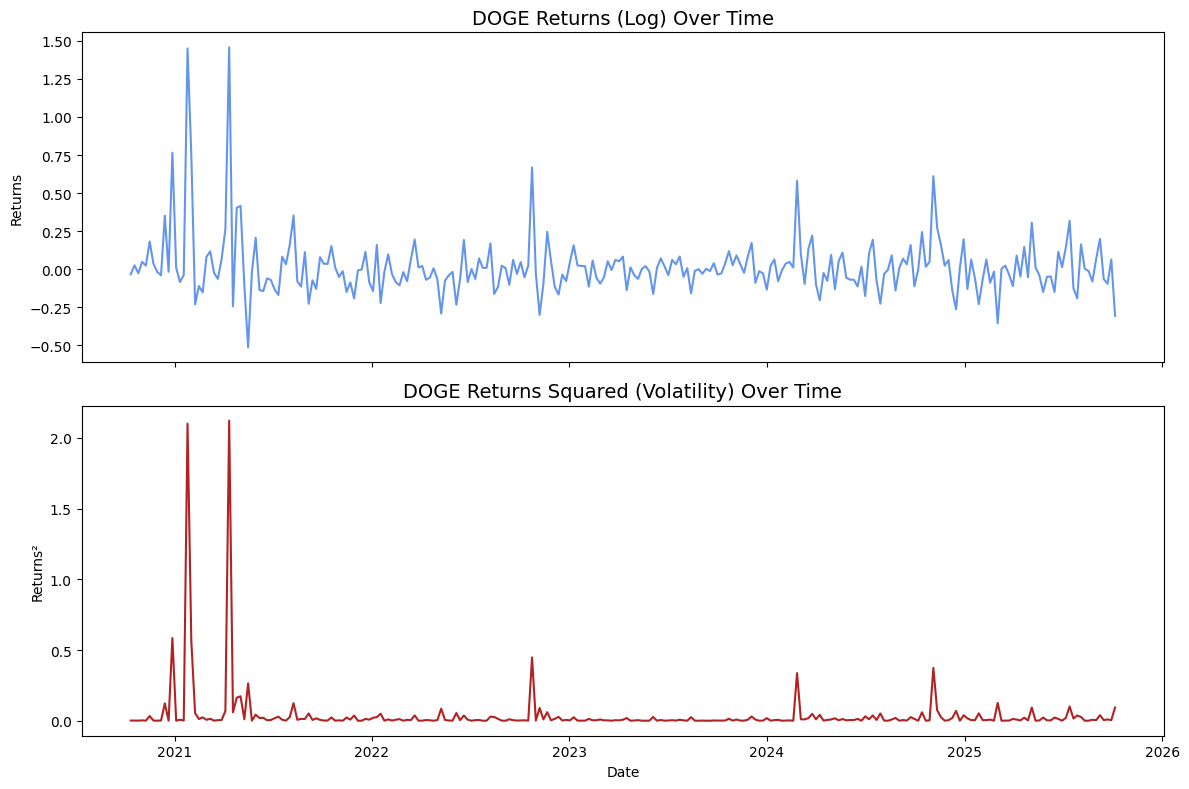

In [ ]:
file_path = "doge.xlsx"
ticker_name = "DOGE"

print(f"================ STARTING ANALYSIS FOR: {ticker_name} ================")

# ----------------------------------------------------------------------
# 1. DATA PREPARATION
# ----------------------------------------------------------------------


df = pd.read_excel(file_path, header=2)

# Select and rename the Close price column and Date
df = df.rename(columns={'Date': 'Date','Unnamed: 1': 'Open', 'Unnamed: 2': 'High', 'Unnamed: 3': 'Low',  'Unnamed: 4': 'Close', 'Unnamed: 5': 'Volume'})

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 1. Price Series (Close)
prices = df['Close'].dropna()

# 2. Returns Series (Log Returns)
returns = np.log(prices / prices.shift(1)).dropna()

# 3. Squared Returns Series (Proxy for Volatility)
returns_sq = returns**2

print("Data processed successfully.")

# ----------------------------------------------------------------------
# 2. 1.1 Random Walk Test (ADF) on Prices
# ----------------------------------------------------------------------
print("\n--- 3.1 Random Walk Test (ADF) on Prices ---")
adf_result = adfuller(prices)

print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] > 0.05:
    print("CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).")
else:
    print("CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.")

# ----------------------------------------------------------------------
# 3. 1.2 ACF Analysis (Autocorrelation) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 4. Autocorrelation Analysis (ACF) ---")

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# ACF for Prices
plot_acf(prices, lags=50, ax=axes[0], title=f'ACF - {ticker_name} Prices (Close)')
# ACF for Returns
plot_acf(returns, lags=50, ax=axes[1], title=f'ACF - {ticker_name} Returns (Log)')
# ACF for Squared Returns
plot_acf(returns_sq, lags=50, ax=axes[2], title=f'ACF - {ticker_name} Returns Squared (Volatility)')

plt.tight_layout()
plt.savefig(f'{ticker_name}_acf_analysis.png')
#plt.close()

print(f"ACF graph saved as '{ticker_name}_acf_analysis.png'")

# ----------------------------------------------------------------------
# 4. 1.3 Volatility and Clustering (Visualization) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 5. Clustered Volatility Visualization ---")

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Returns Series
axes[0].plot(returns.index, returns.values, color='cornflowerblue')
axes[0].set_title(f'{ticker_name} Returns (Log) Over Time', fontsize=14)
axes[0].set_ylabel('Returns')

# Plot 2: Squared Returns Series (proxy for Volatility)
axes[1].plot(returns_sq.index, returns_sq.values, color='firebrick')
axes[1].set_title(f'{ticker_name} Returns Squared (Volatility) Over Time', fontsize=14)
axes[1].set_ylabel('Returns²')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.savefig(f'{ticker_name}_volatility_clustering.png')
#plt.close()

print(f"Volatility graph saved as '{ticker_name}_volatility_clustering.png'")
print(f"================ {ticker_name} ANALYSIS FINISHED =================\n")

## ETH TIME SERIES


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf


================ STARTING ANALYSIS FOR: ETH ================
Data processed successfully.

--- 3.1 Random Walk Test (ADF) on Prices ---
ADF Statistic: -2.9474
p-value: 0.0401
CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.

--- 4. Autocorrelation Analysis (ACF) ---
ACF graph saved as 'ETH_acf_analysis.png'

--- 5. Clustered Volatility Visualization ---
Volatility graph saved as 'ETH_volatility_clustering.png'
================ ETH ANALYSIS FINISHED =================



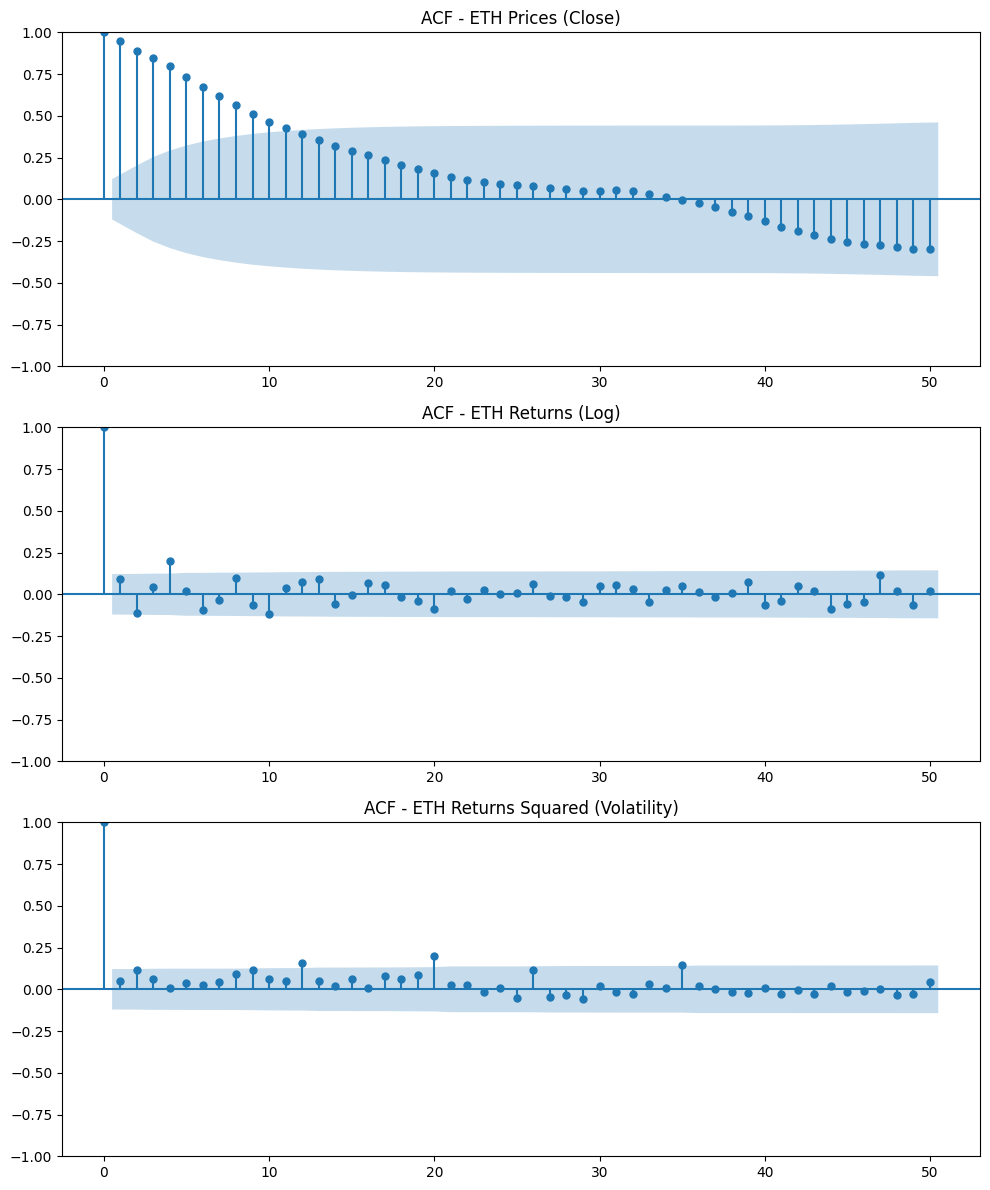

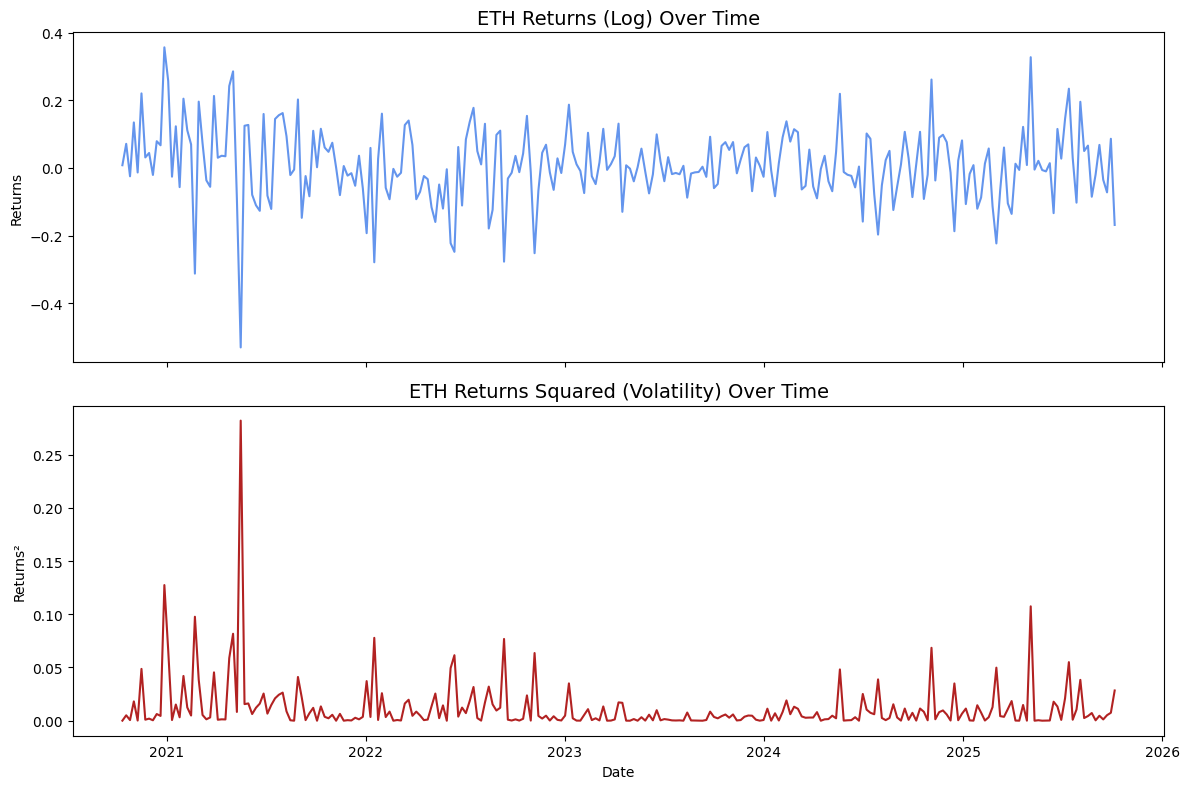

In [ ]:
file_path = "eth.csv.xlsx"
ticker_name = "ETH"

print(f"================ STARTING ANALYSIS FOR: {ticker_name} ================")

# ----------------------------------------------------------------------
# 1. DATA PREPARATION
# ----------------------------------------------------------------------


df = pd.read_excel(file_path, header=2)

# Select and rename the Close price column and Date
df = df.rename(columns={'Date': 'Date','Unnamed: 1': 'Open', 'Unnamed: 2': 'High', 'Unnamed: 3': 'Low',  'Unnamed: 4': 'Close', 'Unnamed: 5': 'Volume'})

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 1. Price Series (Close)
prices = df['Close'].dropna()

# 2. Returns Series (Log Returns)
returns = np.log(prices / prices.shift(1)).dropna()

# 3. Squared Returns Series (Proxy for Volatility)
returns_sq = returns**2

print("Data processed successfully.")

# ----------------------------------------------------------------------
# 2. 1.1 Random Walk Test (ADF) on Prices
# ----------------------------------------------------------------------
print("\n--- 3.1 Random Walk Test (ADF) on Prices ---")
adf_result = adfuller(prices)

print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] > 0.05:
    print("CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).")
else:
    print("CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.")

# ----------------------------------------------------------------------
# 3. 1.2 ACF Analysis (Autocorrelation) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 4. Autocorrelation Analysis (ACF) ---")

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# ACF for Prices
plot_acf(prices, lags=50, ax=axes[0], title=f'ACF - {ticker_name} Prices (Close)')
# ACF for Returns
plot_acf(returns, lags=50, ax=axes[1], title=f'ACF - {ticker_name} Returns (Log)')
# ACF for Squared Returns
plot_acf(returns_sq, lags=50, ax=axes[2], title=f'ACF - {ticker_name} Returns Squared (Volatility)')

plt.tight_layout()
plt.savefig(f'{ticker_name}_acf_analysis.png')
#plt.close()

print(f"ACF graph saved as '{ticker_name}_acf_analysis.png'")

# ----------------------------------------------------------------------
# 4. 1.3 Volatility and Clustering (Visualization) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 5. Clustered Volatility Visualization ---")

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Returns Series
axes[0].plot(returns.index, returns.values, color='cornflowerblue')
axes[0].set_title(f'{ticker_name} Returns (Log) Over Time', fontsize=14)
axes[0].set_ylabel('Returns')

# Plot 2: Squared Returns Series (proxy for Volatility)
axes[1].plot(returns_sq.index, returns_sq.values, color='firebrick')
axes[1].set_title(f'{ticker_name} Returns Squared (Volatility) Over Time', fontsize=14)
axes[1].set_ylabel('Returns²')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.savefig(f'{ticker_name}_volatility_clustering.png')
#plt.close()

print(f"Volatility graph saved as '{ticker_name}_volatility_clustering.png'")
print(f"================ {ticker_name} ANALYSIS FINISHED =================\n")

## XRP TIME SERIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf

================ STARTING ANALYSIS FOR: XRP ================
Data processed successfully.

--- 3.1 Random Walk Test (ADF) on Prices ---
ADF Statistic: -1.3619
p-value: 0.6004
CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).

--- 4. Autocorrelation Analysis (ACF) ---
ACF graph saved as 'XRP_acf_analysis.png'

--- 5. Clustered Volatility Visualization ---
Volatility graph saved as 'XRP_volatility_clustering.png'
================ XRP ANALYSIS FINISHED =================



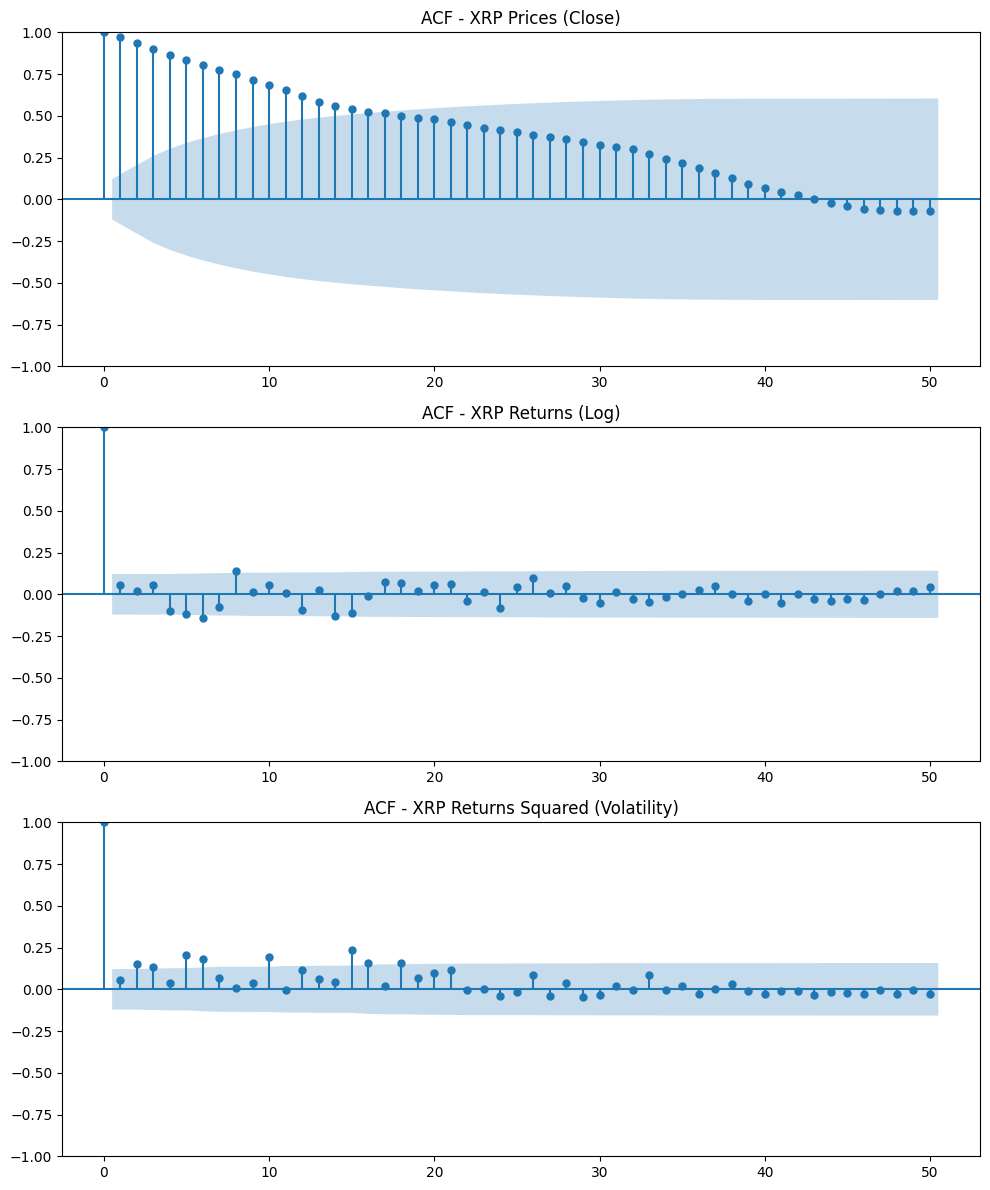

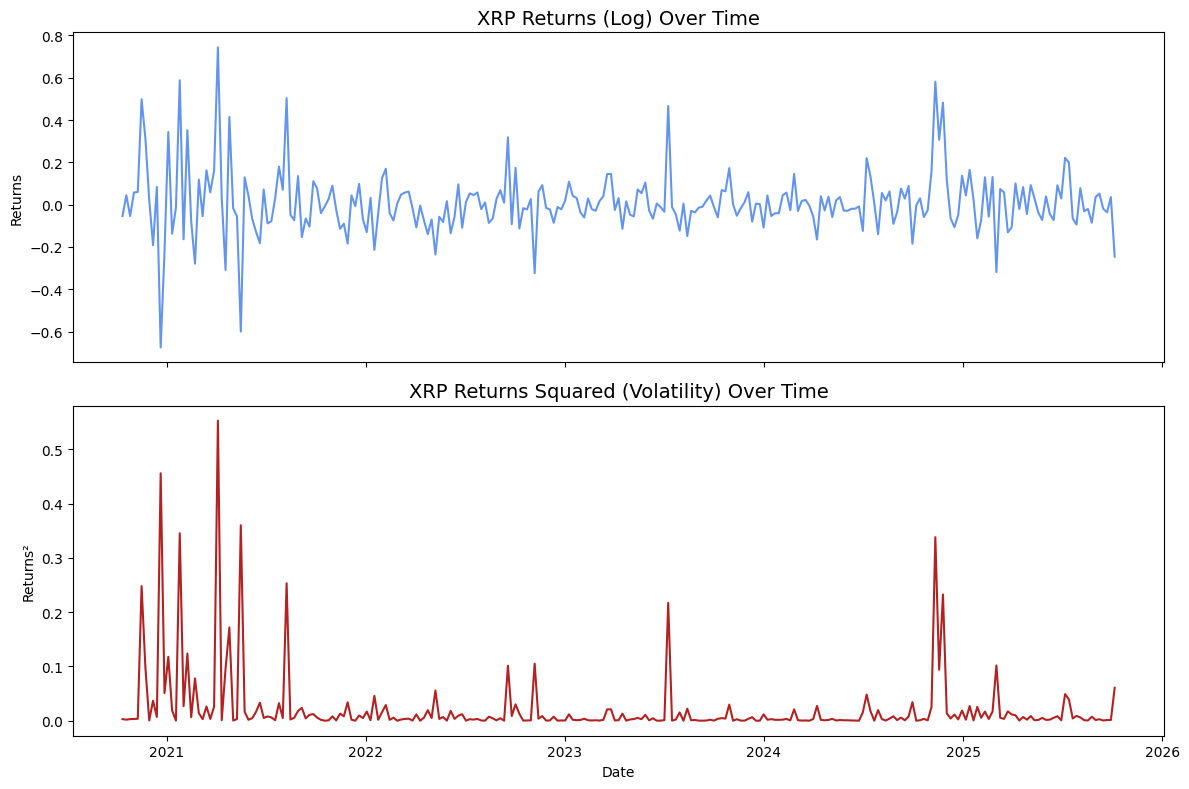

In [ ]:
file_path = "xrp.csv.xlsx"
ticker_name = "XRP"

print(f"================ STARTING ANALYSIS FOR: {ticker_name} ================")

# ----------------------------------------------------------------------
# 1. DATA PREPARATION
# ----------------------------------------------------------------------


df = pd.read_excel(file_path, header=2)

# Select and rename the Close price column and Date
df = df.rename(columns={'Date': 'Date','Unnamed: 1': 'Open', 'Unnamed: 2': 'High', 'Unnamed: 3': 'Low',  'Unnamed: 4': 'Close', 'Unnamed: 5': 'Volume'})

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# 1. Price Series (Close)
prices = df['Close'].dropna()

# 2. Returns Series (Log Returns)
returns = np.log(prices / prices.shift(1)).dropna()

# 3. Squared Returns Series (Proxy for Volatility)
returns_sq = returns**2

print("Data processed successfully.")

# ----------------------------------------------------------------------
# 2. 1.1 Random Walk Test (ADF) on Prices
# ----------------------------------------------------------------------
print("\n--- 3.1 Random Walk Test (ADF) on Prices ---")
adf_result = adfuller(prices)

print(f'ADF Statistic: {adf_result[0]:.4f}')
print(f'p-value: {adf_result[1]:.4f}')

if adf_result[1] > 0.05:
    print("CONCLUSION: The p-value is > 0.05. H0 is not rejected; the series is NON-STATIONARY (Random Walk).")
else:
    print("CONCLUSION: The p-value is <= 0.05. H0 is rejected; the series is STATIONARY.")

# ----------------------------------------------------------------------
# 3. 1.2 ACF Analysis (Autocorrelation) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 4. Autocorrelation Analysis (ACF) ---")

fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# ACF for Prices
plot_acf(prices, lags=50, ax=axes[0], title=f'ACF - {ticker_name} Prices (Close)')
# ACF for Returns
plot_acf(returns, lags=50, ax=axes[1], title=f'ACF - {ticker_name} Returns (Log)')
# ACF for Squared Returns
plot_acf(returns_sq, lags=50, ax=axes[2], title=f'ACF - {ticker_name} Returns Squared (Volatility)')

plt.tight_layout()
plt.savefig(f'{ticker_name}_acf_analysis.png')
#plt.close()

print(f"ACF graph saved as '{ticker_name}_acf_analysis.png'")

# ----------------------------------------------------------------------
# 4. 1.3 Volatility and Clustering (Visualization) - Graph Generation
# ----------------------------------------------------------------------
print("\n--- 5. Clustered Volatility Visualization ---")

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot 1: Returns Series
axes[0].plot(returns.index, returns.values, color='cornflowerblue')
axes[0].set_title(f'{ticker_name} Returns (Log) Over Time', fontsize=14)
axes[0].set_ylabel('Returns')

# Plot 2: Squared Returns Series (proxy for Volatility)
axes[1].plot(returns_sq.index, returns_sq.values, color='firebrick')
axes[1].set_title(f'{ticker_name} Returns Squared (Volatility) Over Time', fontsize=14)
axes[1].set_ylabel('Returns²')
axes[1].set_xlabel('Date')

plt.tight_layout()
plt.savefig(f'{ticker_name}_volatility_clustering.png')
#plt.close()

print(f"Volatility graph saved as '{ticker_name}_volatility_clustering.png'")
print(f"================ {ticker_name} ANALYSIS FINISHED =================\n")

## TIME QUESTIONS GUIDING

1. Are crypto prices random walks?  What does this imply for investing?

Yes, There are three types of cryptocurrencies that are non-stationary. The Augmented Dickey-Fuller (ADF) test on the closing price series produces a high p-value, e.g., 0.9699 (Bitcoin), which means that the series is non-stationary.

On the other hand, the DOGE coin shows a stationary path. This may mean that the prices of this cryptocurrency do not follow a random path, but are mean-reverting (they tend to revert to their historical average), in other words, they are highly predictable.



2. Why do returns² have autocorrelation but returns don't?


Returns do not have linear autocorrelation because the market is efficient, but volatility (Returns
^2) does have it due to the persistence of risk. For example, if the return is zero or significant, this may be because the market is efficient at quickly incorporating information that affects the direction of the price. On the other hand, if returns^2 is significant, the market is slow to adjust risk. This is due to volatility clustering.



3. What is volatility clustering and why does it matter?

Volatility Clustering is the phenomenon observed in financial time series where periods of high price variation (high volatility) tend to cluster together and be followed by similar periods, and the same occurs with periods of low volatility (calm).

Since volatility is predictable (even if its direction is not), it justifies and requires the use of advanced models such as ARCH/GARCH (Autoregressive Conditional Heteroskedasticity) models. These models are specifically designed to capture this clustering and provide more accurate risk (volatility) forecasts.